<a href="https://colab.research.google.com/github/alvaroOficial/python-automatizacion-y-control/blob/main/Segmentacion_clientes_p3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Problem: sistema de segmentacion de clientes; a partir de dinero ahorrado en el banco y salario del cliente
#Asegurarse de tener instalado las librerias
#importar las librerias
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
"""variables de entrada(en millones), Considerando que ambos enfoques generan los mismos resultados,
 en este caso los numeros de dinero ahorrado y salario son expresados en millones, ej:70, son 70M"""
dinero_ahorrado=ctrl.Antecedent(np.arange(0,701,1),'dinero_ahorrado')
salario=ctrl.Antecedent(np.arange(0,21,1),'salario')
#Variable de salida
probabilidad_cliente_preferencial=ctrl.Consequent(np.arange(0,101,1),'probabilidad_cliente_preferencial')

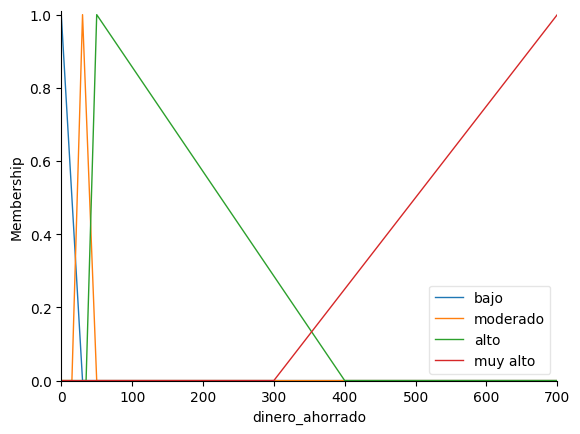

In [ ]:
##Definir Funciones de membresia
#para dinero ahorrado
dinero_ahorrado['bajo']=fuzz.trimf(dinero_ahorrado.universe,[0,0,30])
dinero_ahorrado['moderado']=fuzz.trimf(dinero_ahorrado.universe,[15,30,50])
dinero_ahorrado['alto']=fuzz.trimf(dinero_ahorrado.universe,[35,50,400])
dinero_ahorrado['muy alto']=fuzz.trimf(dinero_ahorrado.universe,[300,700,700])
#visualizar funciones de membresia

dinero_ahorrado.view()


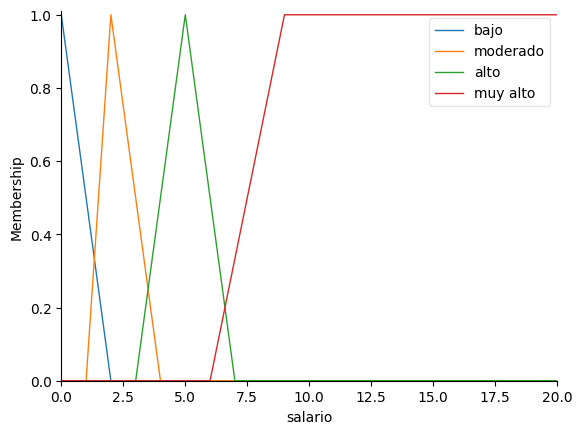

In [ ]:
#para salario(Notacion en millones)
salario['bajo']=fuzz.trimf(salario.universe,[0,0,2])
salario['moderado']=fuzz.trimf(salario.universe,[1.5,2,4])
salario['alto']=fuzz.trimf(salario.universe,[3,5,7])
salario['muy alto']=fuzz.trapmf(salario.universe,[6,9,20,20])

#visualizar funciones de membresia
salario.view()


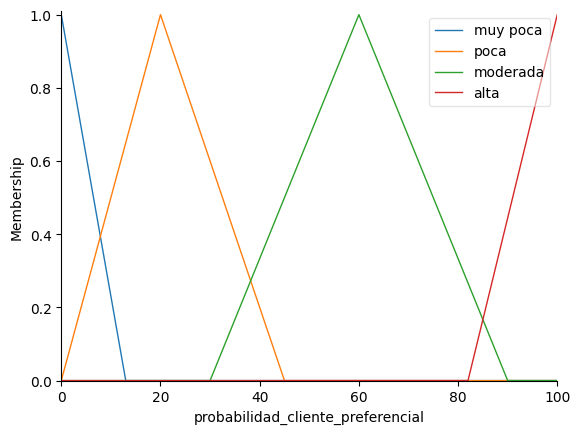

In [ ]:
#para probabilidad de cliente preferencial
probabilidad_cliente_preferencial['muy poca']=fuzz.trimf(probabilidad_cliente_preferencial.universe,[0,0,13])
probabilidad_cliente_preferencial['poca']=fuzz.trimf(probabilidad_cliente_preferencial.universe,[0,20,45])
probabilidad_cliente_preferencial['moderada']=fuzz.trimf(probabilidad_cliente_preferencial.universe,[30,60,90])
probabilidad_cliente_preferencial['alta']=fuzz.trimf(probabilidad_cliente_preferencial.universe,[82,100,100])

#visualizar funciones de membresia
probabilidad_cliente_preferencial.view()


In [ ]:
#definir reglas difusas
regla11=ctrl.Rule(dinero_ahorrado['bajo']&salario['bajo'],probabilidad_cliente_preferencial['muy poca'])
regla12=ctrl.Rule(dinero_ahorrado['moderado']&salario['bajo'],probabilidad_cliente_preferencial['muy poca'])
regla13=ctrl.Rule(dinero_ahorrado['alto']&salario['bajo'],probabilidad_cliente_preferencial['poca'])
regla14=ctrl.Rule(dinero_ahorrado['muy alto']&salario['bajo'],probabilidad_cliente_preferencial['poca'])

regla21=ctrl.Rule(dinero_ahorrado['bajo']&salario['moderado'],probabilidad_cliente_preferencial['muy poca'])
regla22=ctrl.Rule(dinero_ahorrado['moderado']&salario['moderado'],probabilidad_cliente_preferencial['muy poca'])
regla23=ctrl.Rule(dinero_ahorrado['alto']&salario['moderado'],probabilidad_cliente_preferencial['poca'])
regla24=ctrl.Rule(dinero_ahorrado['muy alto']&salario['moderado'],probabilidad_cliente_preferencial['poca'])


regla31=ctrl.Rule(dinero_ahorrado['bajo']&salario['alto'],probabilidad_cliente_preferencial['poca'])
regla32=ctrl.Rule(dinero_ahorrado['moderado']&salario['alto'],probabilidad_cliente_preferencial['poca'])
regla33=ctrl.Rule(dinero_ahorrado['alto']&salario['alto'],probabilidad_cliente_preferencial['moderada'])
regla34=ctrl.Rule(dinero_ahorrado['muy alto']&salario['alto'],probabilidad_cliente_preferencial['moderada'])


regla41=ctrl.Rule(dinero_ahorrado['bajo']&salario['muy alto'],probabilidad_cliente_preferencial['moderada'])
regla42=ctrl.Rule(dinero_ahorrado['moderado']&salario['muy alto'],probabilidad_cliente_preferencial['moderada'])
regla43=ctrl.Rule(dinero_ahorrado['alto']&salario['muy alto'],probabilidad_cliente_preferencial['moderada'])
regla44=ctrl.Rule(dinero_ahorrado['muy alto']&salario['muy alto'],probabilidad_cliente_preferencial['alta'])

sistema_control = ctrl.ControlSystem(
    [
        regla11,
        regla12,
        regla13,
        regla14,
        regla21,
        regla22,
        regla23,
        regla24,
        regla31,
        regla22,
        regla33,
        regla34,
        regla41,
        regla42,
        regla43,
        regla44,

    ]
)

#Definir el controlador
controlador=ctrl.ControlSystemSimulation(sistema_control)


In [ ]:
#Evaluar cada caso pedido
"""
Adriana debe tener una probabilidad de al menos 90% de ser preferencial,
con 500 Millones ahorrados y un salario de $15 Millones al mes.
"""
#ingresa los valores de entrada En M
controlador.input['dinero_ahorrado']=500
controlador.input['salario']=15

controlador.compute()
#resultado
probabilidad_calculada = controlador.output['probabilidad_cliente_preferencial']
print(f"La probabilidad de ser cliente preferencial es:{probabilidad_calculada}%")


La probabilidad de ser cliente preferencial es:93.0%


In [ ]:
"""Nelson debe tener una probabilidad alrededor de 60% de ser preferencial,tiene $30
millones ahorrados y un salario de $9 millones al mes. """

#ingresa los valores de entrada en M
controlador.input['dinero_ahorrado']=30
controlador.input['salario']=9

controlador.compute()
#resultado
probabilidad_calculada = controlador.output['probabilidad_cliente_preferencial']
print(f"La probabilidad de ser cliente preferencial es:{probabilidad_calculada}%")


La probabilidad de ser cliente preferencial es:60.00000000000001%


In [ ]:
"""Federico no debe sobrepasar una probabilidad de 20% de ser preferencial,tene $40
millones ahorrados y un salario de $1.160.000 al mes. """
#ingresa los valores de entrada en M
controlador.input['dinero_ahorrado']=40
controlador.input['salario']=1.16

controlador.compute()
#resultado
probabilidad_calculada = controlador.output['probabilidad_cliente_preferencial']
print(f"La probabilidad de ser cliente preferencial es:{probabilidad_calculada}%")


La probabilidad de ser cliente preferencial es:19.674781178518128%


In [ ]:
"""Verónica debe estar alrededor de un 5% de ser preferencial, no tiene dinero
ahorrado en el banco y su salario es de $1.500.000"""
#ingresa los valores de entrada(en M)
controlador.input['dinero_ahorrado']=0
controlador.input['salario']=1.5

controlador.compute()
#resultado
probabilidad_calculada = controlador.output['probabilidad_cliente_preferencial']
print(f"La probabilidad de ser cliente preferencial es:{probabilidad_calculada}%")

La probabilidad de ser cliente preferencial es:5.055555555555557%
